In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("tri.log")
df.head()
df["recall"] = -np.log10(1 - df["recall"])

In [3]:
df_hnsw = df[df["tri_ef"]==0]
df_tri = df[df["tri_ef"]!=0]
df["method"] = df["tri_ef"].apply(lambda x: "tri" if x !=0 else "hnsw")

/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length

<Axes: xlabel='recall', ylabel='min_time'>

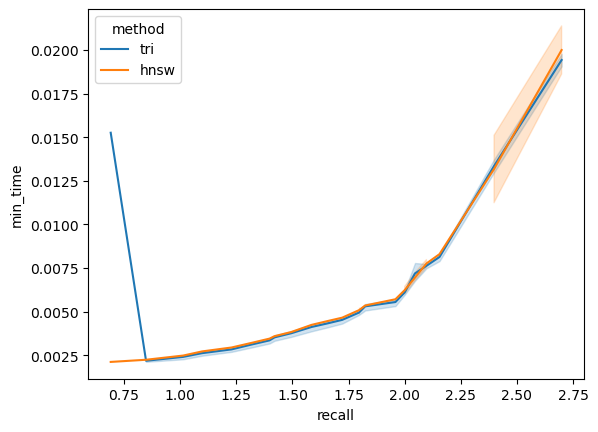

In [4]:
sns.lineplot(df, x="recall", y="min_time", hue="method")

In [5]:
df2 = df.copy()
df2["diff"] = df2["ef"] - df2["tri_ef"]
df2 = df2[np.logical_or(df2["diff"] <= 1, df2["tri_ef"]==0)]
for i, row in df2.iterrows():
    if row["tri_ef"] == 0:
        df2.loc[i, "method"] = "hnsw"
    elif row["diff"] == 1:
        df2.loc[i, "method"] = "tri@1"
    elif row["diff"] == 2:
        df2.loc[i, "method"] = "tri@2"
    elif row["diff"] == 3:
        df2.loc[i, "method"] = "tri@3"
    else:
        df2.loc[i, "method"] =  None

/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length

<Axes: xlabel='recall', ylabel='min_time'>

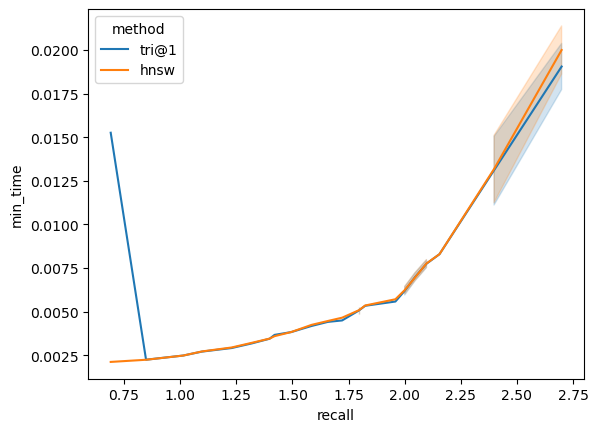

In [6]:
sns.lineplot(df2, x="recall", y="min_time", hue="method")

/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length

,ef,tri_ef,time,min_time,recall,method
0,2,1,0.015560,0.015258,0.690370,tri%-1
1,2,0,0.007950,0.002119,0.690370,hnsw
3,3,1,0.002194,0.002124,0.847712,tri%-1
4,3,0,0.003917,0.002243,0.847712,hnsw
7,4,1,0.002357,0.002270,1.013228,tri%-1
8,4,0,0.002538,0.002484,1.013228,hnsw
12,5,1,0.002454,0.002396,1.096910,tri%-1
13,5,0,0.002752,0.002720,1.096910,hnsw
18,6,1,0.002649,0.002554,1.229148,tri%-1
19,6,0,0.003003,0.002947,1.229148,hnsw


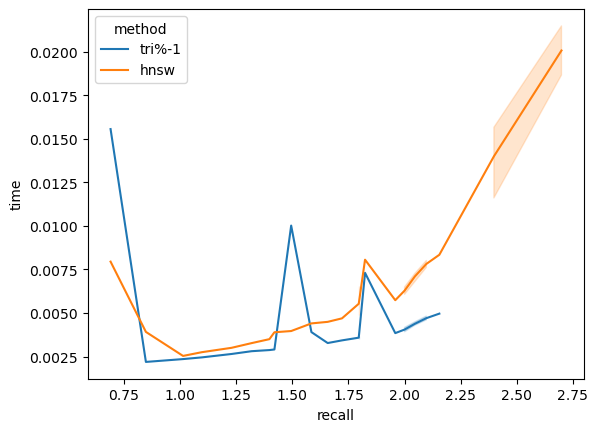

In [14]:
df3 = df.copy()
df3 = df3[df3["tri_ef"]<=1]
df3["method"] = df3["tri_ef"].apply(lambda x: "hnsw" if x == 0 else "tri%-1" if x == 1 else None)
sns.lineplot(df3, x="recall", y="time", hue="method")
df3

In [7]:
# lowerbound_recall = query(ef == tri_ef and tri_ef == 0).recall

for i, row in df2.iterrows():
    if row["tri_ef"] == 0:
        df2.loc[i, "lowerbound_recall"] = row["recall"]
    else:
        result = df2.query(f"tri_ef == 0 and ef == {row['tri_ef']}")
        if len(result) == 0:
            pass
        else:
            df2.loc[i, "lowerbound_recall"] = result["recall"].values[0]

# 全打印
# df2.to_csv("tri.log2", index=False)
pd.set_option('display.max_rows', None)
df2

,ef,tri_ef,time,min_time,recall,method,diff,lowerbound_recall
0,2,1,0.015560,0.015258,0.690370,tri@1,1,NaN
1,2,0,0.007950,0.002119,0.690370,hnsw,2,0.690370
2,3,2,0.002297,0.002246,0.847712,tri@1,1,0.690370
4,3,0,0.003917,0.002243,0.847712,hnsw,3,0.847712
5,4,3,0.002631,0.002485,1.013228,tri@1,1,0.847712
8,4,0,0.002538,0.002484,1.013228,hnsw,4,1.013228
9,5,4,0.002763,0.002711,1.096910,tri@1,1,1.013228
13,5,0,0.002752,0.002720,1.096910,hnsw,5,1.096910
14,6,5,0.002977,0.002915,1.229148,tri@1,1,1.096910
19,6,0,0.003003,0.002947,1.229148,hnsw,6,1.229148


In [8]:
df2 = df2[df2["lowerbound_recall"] <= df2["recall"]]
df2 = df2[df2["recall"] < 1.5]


/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panjunda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length

<Axes: xlabel='recall', ylabel='min_time'>

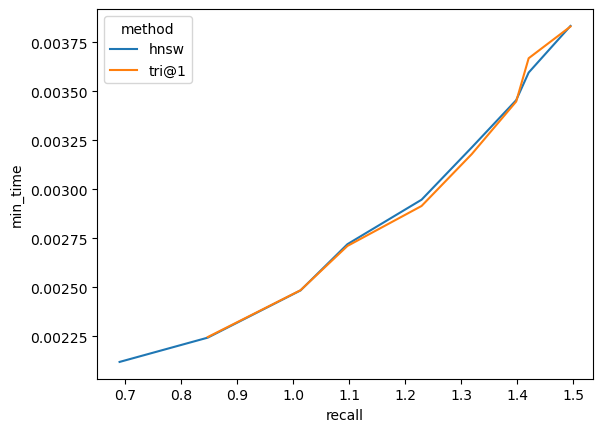

In [9]:
sns.lineplot(df2, x="recall", y="min_time", hue="method")